## <div align="center" style="color:Cyan;"> **Phân tích dữ liệu thông minh** </div>
## <div align="center" style="color:Cyan;"> **Đồ án thực hành** </div>
# <div align="center"> Predict Student Performance from Game Play </div>


## **Import các thư viện cần thiết**

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Giới thiệu

| Name      | MSSV |    Phân công công việc    |    Tiến độ hoàn thành    |
| ----------- | ----------- | ----------- | ----------- |
| Lê Nguyễn Nguyên Anh      | 20127438       ||100%|
| Đặng Tiến Đạt      | 20127458       ||100%|
| Nguyễn Quốc Thắng   | 20127627        ||100%|
| Phạm Thị Ánh Phát   | 20127680        ||100%|

- Đồ án được lấy từ cuộc thi [Predict Student Performance from Game Play](https://www.kaggle.com/c/data-science-bowl-2019/overview) trên Kaggle. 
- Hiện tại cuộc thi đã hoàn thành và đã kết thúc.
- Mục tiêu của cuộc thi là dự đoán điểm số của học sinh dựa trên dữ liệu về cách chơi game của học sinh. Sau đó sử dụng kết quả dự đoán sẽ giúp thúc đẩy việc nghiên cứu các phương pháp theo dõi kiến thưucs học sinh dựa trên việc học tập trên các trò chơi giáo dục để tạo ra trải nghiệm học tập hiệu quả hơn cho học sinh, sinh viên.

In [21]:
dtypes={
    'elapsed_time':np.int64,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}

data1 = pd.read_csv('./data/train.csv', dtype=dtypes,nrows=10000)
print("Full train dataset shape is {}".format(data1.shape))

Full train dataset shape is (10000, 20)


In [22]:
data1.head(10)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991394,-157.314682,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485077,-199.971680,593.0,485.0,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
7,20090312431273200,7,6180,person_click,basic,0,NaN,503.355133,-168.619919,609.0,453.0,NaN,I get to go to Gramps's meeting!,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
8,20090312431273200,8,7014,person_click,basic,0,NaN,510.733429,-157.720642,615.0,442.0,NaN,Now where did I put my notebook?,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
9,20090312431273200,9,7946,person_click,basic,0,NaN,512.048035,-153.743637,616.0,438.0,NaN,\u00f0\u0178\u02dc\u00b4,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   session_id      10000 non-null  int64   
 1   index           10000 non-null  int64   
 2   elapsed_time    10000 non-null  int32   
 3   event_name      10000 non-null  category
 4   name            10000 non-null  category
 5   level           10000 non-null  uint8   
 6   page            234 non-null    float64 
 7   room_coor_x     8985 non-null   float32 
 8   room_coor_y     8985 non-null   float32 
 9   screen_coor_x   8985 non-null   float32 
 10  screen_coor_y   8985 non-null   float32 
 11  hover_duration  987 non-null    float32 
 12  text            3632 non-null   category
 13  fqid            6969 non-null   category
 14  room_fqid       10000 non-null  category
 15  text_fqid       3632 non-null   category
 16  fullscreen      10000 non-null  category
 17  hq           

In [28]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
session_id,10000.0,2.009031e+16,8.051530e+08,2.009031e+16,2.009031e+16,2.009031e+16,2.009031e+16,2.009031e+16
index,10000.0,6.165900e+02,4.272893e+02,0.000000e+00,2.640000e+02,5.810000e+02,8.760000e+02,1.875000e+03
elapsed_time,10000.0,1.255310e+06,1.087167e+06,0.000000e+00,3.944885e+05,9.308475e+05,1.918895e+06,4.208427e+06
level,10000.0,1.267790e+01,6.633804e+00,0.000000e+00,7.000000e+00,1.500000e+01,1.800000e+01,2.200000e+01
page,234.0,3.504274e+00,2.175257e+00,0.000000e+00,1.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
room_coor_x,8985.0,-4.736070e+01,5.116331e+02,-1.910093e+03,-3.596563e+02,-1.334851e+01,3.095025e+02,1.234470e+03
room_coor_y,8985.0,-1.011081e+02,2.178630e+02,-9.027156e+02,-2.075468e+02,-8.253683e+01,4.000000e+01,4.849953e+02
screen_coor_x,8985.0,4.725191e+02,2.687795e+02,0.000000e+00,2.680000e+02,4.580000e+02,6.870000e+02,1.196000e+03
screen_coor_y,8985.0,3.877369e+02,1.421730e+02,6.000000e+00,2.950000e+02,3.920000e+02,4.790000e+02,8.980000e+02
hover_duration,987.0,1.217532e+03,2.265684e+03,1.400000e+01,8.200000e+01,3.830000e+02,1.092500e+03,2.669500e+04


## 2. Khám phá dữ liệu

## Xử lý câu hỏi đặt ra train_labels.csv

In [25]:
train_labels = pd.read_csv('./data/train_labels.csv')
train_labels.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [26]:
# tách thêm cột question và session tương ứng
train_labels['session'] = train_labels['session_id'].str.split('_', expand=True)[0]
train_labels['question'] = train_labels['session_id'].str.split('_', expand=True)[1]
train_labels.head()

,session_id,correct,session,question
0,20090312431273200_q1,1,20090312431273200,q1
1,20090312433251036_q1,0,20090312433251036,q1
2,20090312455206810_q1,1,20090312455206810,q1
3,20090313091715820_q1,0,20090313091715820,q1
4,20090313571836404_q1,1,20090313571836404,q1


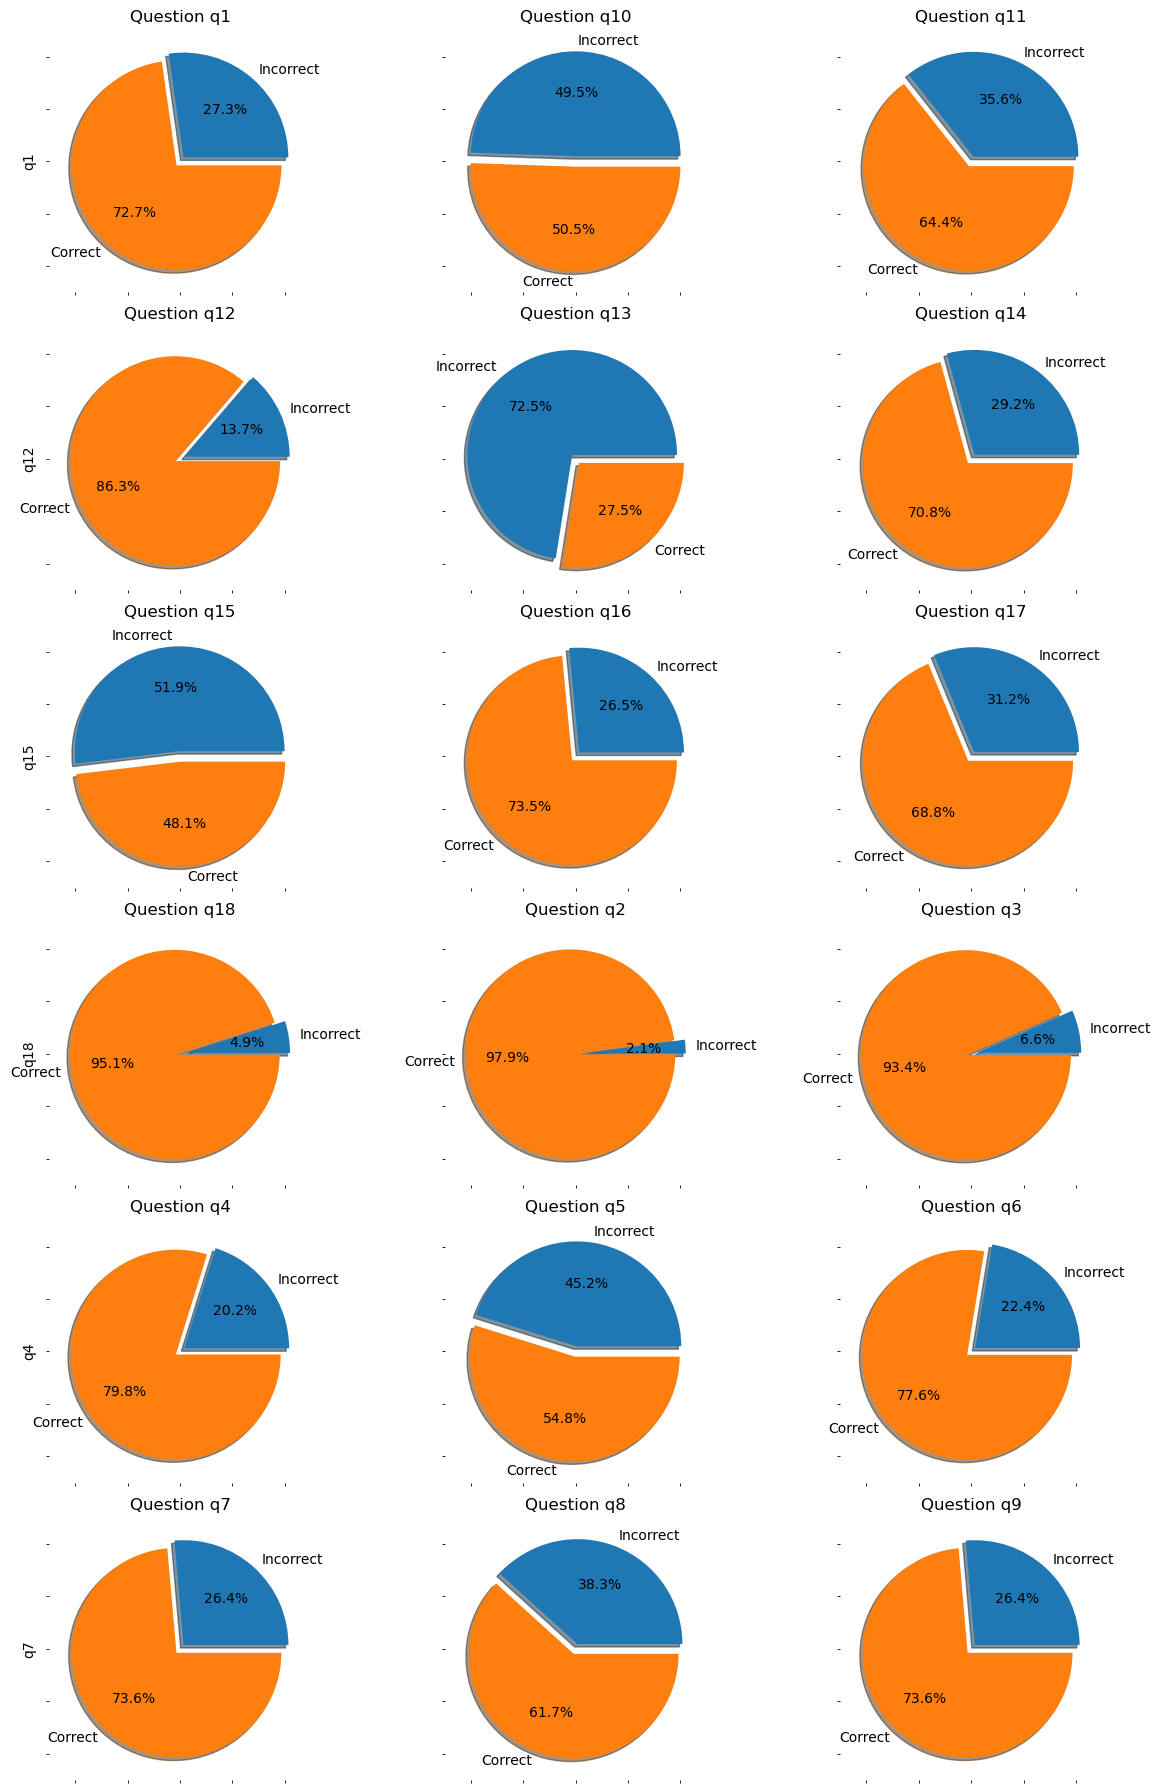

In [27]:
question_counts = train_labels.groupby(['question', 'correct']).size().unstack(fill_value=0)

# Calculate the number of rows needed
num_rows = int(np.ceil(len(question_counts) / 3))

# Create subplots with 3 columns
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 3 * num_rows), sharex=True, sharey=True)

# Flatten the 2D array of subplots
axs = axs.flatten()

# Plot a pie chart for each question
for i, (question, row) in enumerate(question_counts.iterrows()):
    ax = axs[i]
    row.plot(kind='pie', autopct='%1.1f%%', ax=ax, shadow=True, explode=(0.05, 0.05), labels=['Incorrect', 'Correct'])
    ax.set_title(f'Question {question}')

# Remove empty subplots if there are any
for j in range(len(question_counts), len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the pie charts
plt.show()

In [33]:
data1.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [34]:
VAR_CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
VAR_NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [35]:
VAR_EVENT = data1['event_name'].unique()
VAR_EVENT

['cutscene_click', 'person_click', 'navigate_click', 'observation_click', 'notification_click', ..., 'object_hover', 'map_hover', 'map_click', 'checkpoint', 'notebook_click']
Length: 11
Categories (11, object): ['cutscene_click', 'person_click', 'navigate_click', 'observation_click', ..., 'map_hover', 'map_click', 'checkpoint', 'notebook_click']

In [56]:
def feature_engineer(data_train):
    dfs = []
    for c in VAR_CATEGORICAL:
        tmp = data_train.groupby(['session_id','level_group'])[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in VAR_NUMERICAL:
        tmp = data_train.groupby(['session_id','level_group'])[c].agg('mean')
        dfs.append(tmp)
    for c in VAR_NUMERICAL:
        tmp = data_train.groupby(['session_id','level_group'])[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    for c in VAR_EVENT:
        data_train[c] = (data_train['event_name'] == c).astype('int8')
        tmp = data_train.groupby(['session_id','level_group'])[c].agg('sum')
        tmp.name = tmp.name + '_sum'
        dfs.append(tmp)
    data_train = pd.concat(dfs,axis=1)
    data_train = data_train.fillna(-1)
    data_train = data_train.reset_index()
    data_train = data_train.set_index('session_id')
    return data_train

In [57]:
df_feature = feature_engineer(data1)
df_feature.head()

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,...,person_click_sum,navigate_click_sum,observation_click_sum,notification_click_sum,object_click_sum,object_hover_sum,map_hover_sum,map_click_sum,checkpoint_sum,notebook_click_sum
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.0,7.701275,...,22.0,81.0,4,8,11,4,4.0,2,1,0
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.0,-130.347168,...,123.0,170.0,3,10,20,13,14.0,6,1,0
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.0,14.306062,...,104.0,103.0,1,9,28,21,9.0,8,1,0
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.0,-84.045959,...,18.0,49.0,2,5,15,5,3.0,3,1,2
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.1,-30.762283,...,145.0,637.0,5,14,83,66,186.0,45,1,50


In [58]:
# write file
df_feature.to_csv('./data/feature.csv')

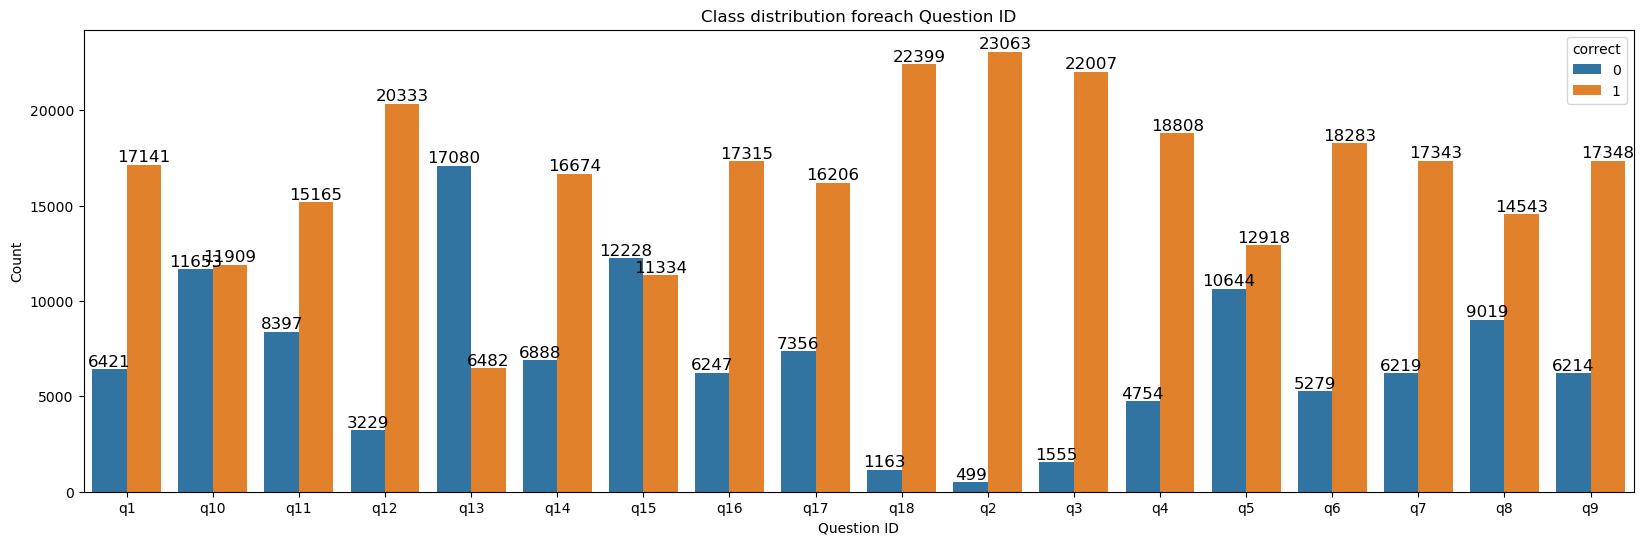

In [61]:
class_dist = train_labels.groupby('question')['correct'].value_counts().reset_index(name='count')

plt.figure(figsize=(20, 6))
ax = sns.barplot(data=class_dist, x='question', y='count', hue='correct')
plt.xlabel('Question ID')
plt.ylabel('Count')
plt.title('Class distribution foreach Question ID')

# Adding the text labels on each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height(),
        '{0:.0f}'.format(
            p.get_height()
        ), 
        fontsize=12, 
        ha='center', 
        va='bottom'
    )

plt.show()